# 绝对位置编码（三角式）
## 整体的值分布

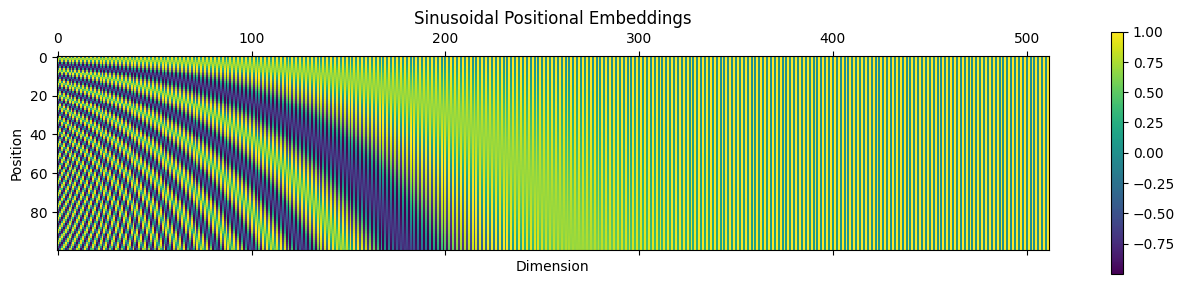

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P


P = getPositionEncoding(seq_len=100, d=512, n=10000)
cax = plt.matshow(P)
plt.title('Sinusoidal Positional Embeddings')
plt.xlabel('Dimension')
plt.ylabel('Position')
plt.gcf().colorbar(cax)

## Sinusoidal 位置编码与位置之间的关系 （偶分量）

- 位置越远，频率越大
- 随着维度增大，函数逐渐收敛到 0 （cos 函数收敛到 1 ）

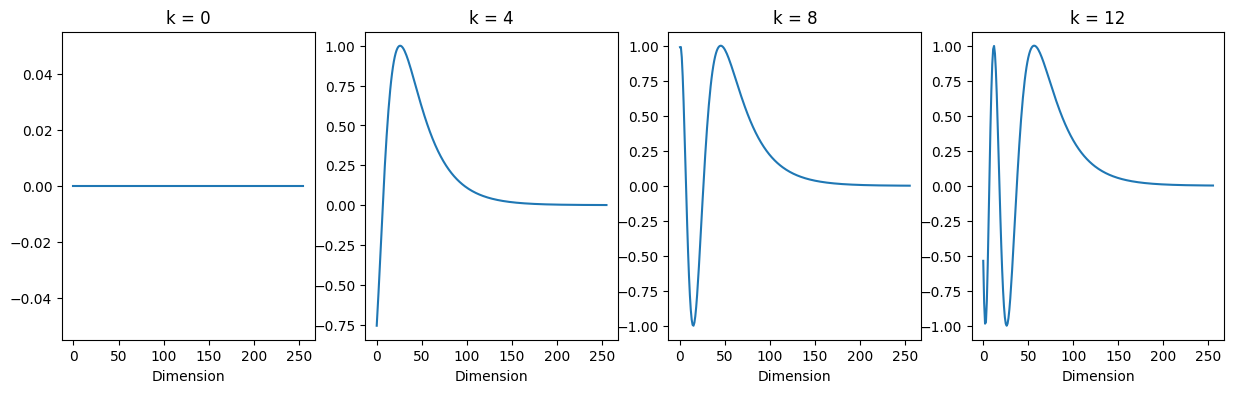

In [2]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 256, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))
    plt.xlabel('Dimension')

fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)

## Sinusoidal 位置编码与位置之间的关系 （奇分量）

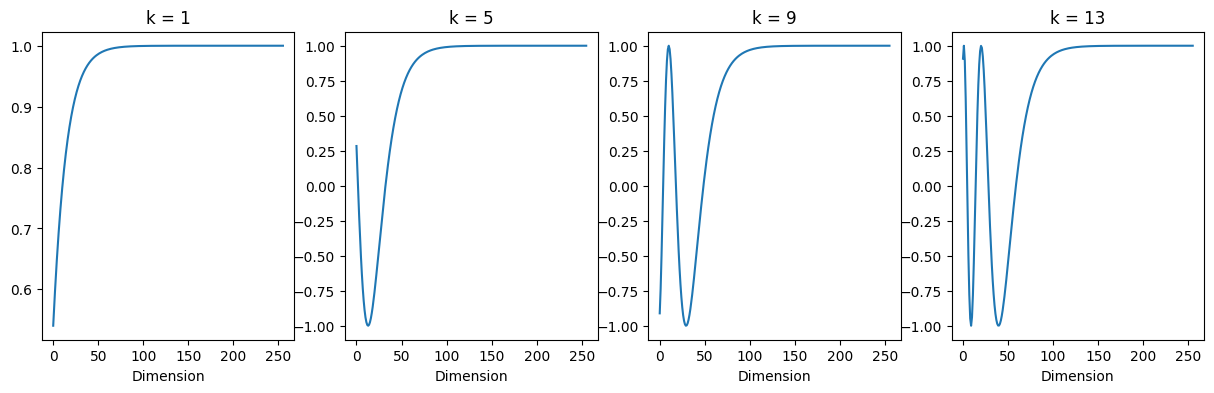

In [3]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 256, 1)
    denominator = np.power(n, 2*x/d)
    y = np.cos(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))
    plt.xlabel('Dimension')

fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4+1)

## Sinusoidal 位置编码与维度分量之间的关系

- 每个分量都具有周期性，是正弦或余弦函数
- 越靠后的分量(i 越大)，波长越长，频率越低

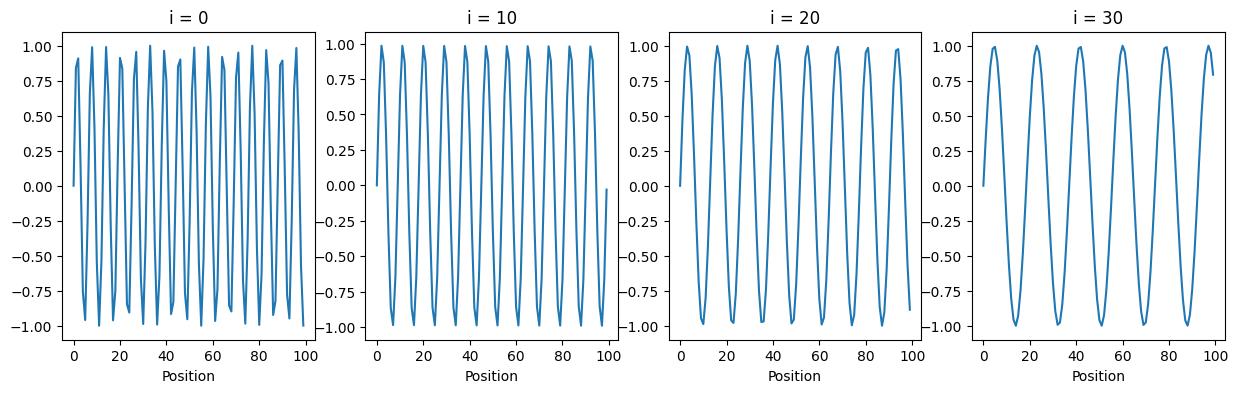

In [6]:
def plotSinusoid(x, d=512, n=10000):
    k = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(k, y)
    plt.title('i = ' + str(x))
    plt.xlabel('Position')

fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*10)

## Sinusoidal 位置编码与base之间的关系

- base 越大，频率越低

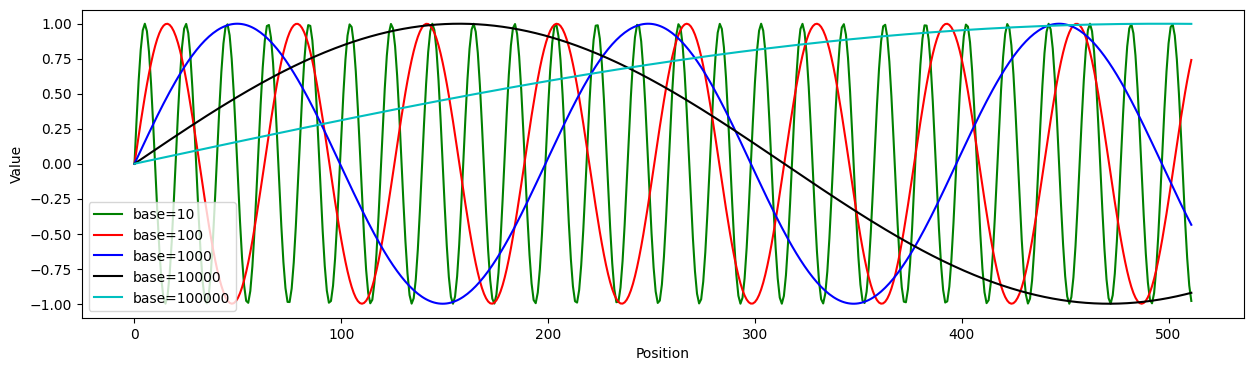

In [14]:
base_list = [10, 100, 1000, 10000, 100000]

def plotSinusoid(x, d=512):
    k = np.arange(0, 512, 1)

    y = np.zeros((len(base_list),len(k)))
    for b in range(len(base_list)):
        n = base_list[b]
        denominator = np.power(n, 2*x/d)
        res = np.sin(k/denominator)
        y[b]=res

    plt.plot(k, y[0], 'g', label='base='+str(base_list[0]))
    plt.plot(k, y[1], 'r', label='base='+str(base_list[1]))
    plt.plot(k, y[2], 'b', label='base='+str(base_list[2]))
    plt.plot(k, y[3], 'k', label='base='+str(base_list[3]))
    plt.plot(k, y[4], 'c', label='base='+str(base_list[4]))
    
    plt.xlabel('Position')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

fig = plt.figure(figsize=(15, 4)) 
plotSinusoid(128)